In [1]:
# This notebook is for playing with fixed density/pressure/temperature models.

In [2]:
# This cell sets the working directory so that the code will work on the cloud as well.

import os
cur_dir = os.getcwd()
if cur_dir.split('/')[-1] == "test":
    os.chdir('./..')

In [3]:
import numpy as np
import random
from matplotlib               import pyplot as plt
from matplotlib.pyplot        import figure, legend

import lib.temperature as temperature
import lib.mc_density  as mc_density
import lib.mc_interior as mc_interior
import lib.allona      as allona
import lib.constants   as constants
import lib.profile     as profile

In [4]:
def load_pm_format_csv(filename, debug=False):
    # Load raw data
    aa = [x.strip("\n").split(',') for x in open(filename).readlines()][1:]
    raw = [[float(x) for x in y] for y in aa]
    
    # Create input arrays.
    radius = np.array(list(reversed([x[0] for x in raw])))
    rho = np.array(list(reversed([x[1] for x in raw])))
    temp = np.array(list(reversed([x[3] for x in raw])))
    pressure = np.array(list(reversed([x[2] for x in raw])))
    
    
    # Density model
    model = mc_density.MCDensity(radius, rho)
    if debug:
        plt.plot(radius, pressure, label="input_pressure")
        model.plot_pressure()    
    # Test:
    print ("mass of model is %s"%model.get_mass())
    
    # Compute composition from temperature
    catalog = temperature.iron_sio2_water_H_catalog()
    composition = []
    for t,r,p  in zip(temp/1.1, model.get_densities(), model.get_pressure()):
        c= catalog.get_composition(t,r,p)
        composition.append(c)
        mix = np.array([catalog.composition_to_mix(x) for x in composition])

    # Interior model
    planet = mc_interior.MCInterior(radius, rho, mix, catalog)
    
    if debug:
        figure()
        plt.plot(radius, temp, label="input temp")
        planet.plot_temp()    
    
    return planet

mass of model is 8.735819462194683e+28


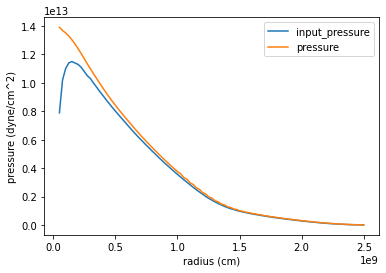

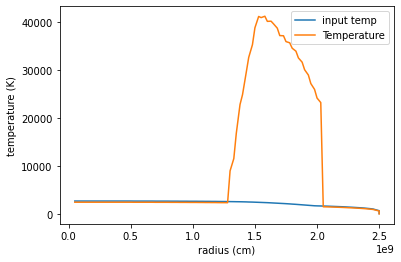

In [6]:
planet = load_pm_format_csv("from_csv/seed255.csv", debug=True)

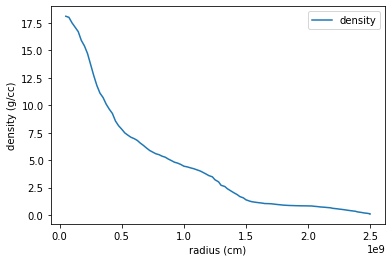

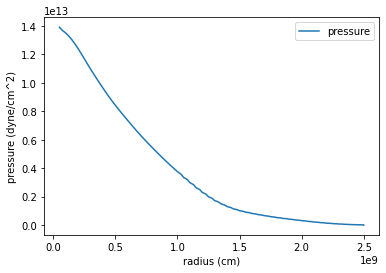

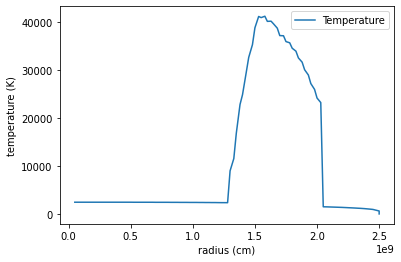

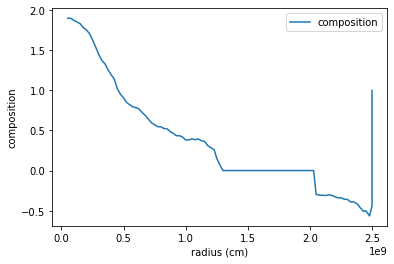

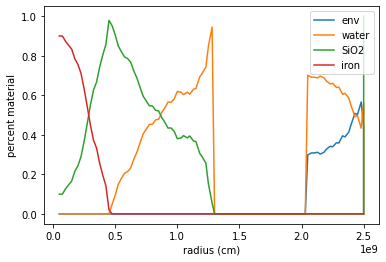

In [7]:
planet.plot_densities()
figure()
planet.plot_pressure()
figure()

planet.plot_temp()
figure()
planet.plot_composition()
figure()
planet.plot_mix()